In [1]:
import torch

print(torch.cuda.device_count())  # 使用可能なGPUの数を表示
print(torch.cuda.get_device_name(0))  # 最初のGPUの名前を表示
print(torch.cuda.get_device_name(1))  # 二番目のGPUの名前を表示

2
NVIDIA RTX A6000
NVIDIA RTX A6000


In [38]:
import torch
import logging
device = torch.device("cuda:1")
logger = logging.getLogger(__name__)

In [34]:
!export CUDA_VISIBLE_DEVICES=1
!export PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


### デフォルト自作関数

In [21]:
# 保存用
import pickle
def read_bin(filename):
    with open(filename,'rb') as bf:
        bin_data = pickle.load(bf)
    return bin_data

def save_bin(filename,data):
    with open(filename,'wb') as bf:
        pickle.dump(data,bf)

In [22]:
# 時間取得関数
from datetime import datetime, timedelta
# https://qiita.com/haruka_kotani/items/0e2096cbd527015a2d96

twitter_epoch = 1288834974657
unix_epoch = 62135596800000
timestamp_bits = 41
timestamp_shift = 22
timestamp_mask = (1 << timestamp_bits) - 1

def get_datetime(tweet_id):
    timestamp = ((tweet_id >> timestamp_shift) & timestamp_mask) + twitter_epoch + unix_epoch
    tweet_datetime = datetime(1, 1, 1) + timedelta(milliseconds=timestamp)
    return tweet_datetime

### 24/6/24

## Twitter ID →　日付　関数

In [20]:
from datetime import datetime, timedelta
# https://qiita.com/haruka_kotani/items/0e2096cbd527015a2d96

twitter_epoch = 1288834974657
unix_epoch = 62135596800000
timestamp_bits = 41
timestamp_shift = 22
timestamp_mask = (1 << timestamp_bits) - 1

def get_datetime(tweet_id):
    timestamp = ((tweet_id >> timestamp_shift) & timestamp_mask) + twitter_epoch + unix_epoch
    tweet_datetime = datetime(1, 1, 1) + timedelta(milliseconds=timestamp)
    return tweet_datetime

In [2]:
# 使用例
tweet_id = 1237560750102556672
tweet_datetime = get_datetime(tweet_id)
print(tweet_datetime.strftime("%Y-%m-%d %H:%M:%S.%f")[:-3])

local_tweet_datetime = tweet_datetime + timedelta(hours=9)
print(local_tweet_datetime.strftime("%Y-%m-%d %H:%M:%S.%f")[:-3])

2020-03-11 02:07:30.248
2020-03-11 11:07:30.248


## 使用tweetの時間帯分布確認

In [3]:
import pandas as pd
file_path = "nlp4if-2021_en/v3/covid19_disinfo_binary_english_train_ids.tsv"
df_ids = pd.read_csv(file_path, sep='\t',index_col="tweet_no")

In [4]:
datetime_list = []
for a_id in df_ids["tweet_id"]:
    datetime_list.append(get_datetime(a_id))

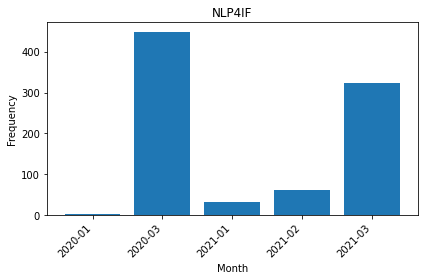

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# リストをdatetime型に変換
datetime_list = pd.to_datetime(datetime_list)

# DataFrameに変換，月単位に変換，月ごとの頻度をカウント，ヒストグラムを作成
df = pd.DataFrame(datetime_list, columns=['datetime'])
df['month'] = df['datetime'].dt.to_period('M')
month_counts = df['month'].value_counts().sort_index()
month_counts.plot(kind='bar', width=0.8)

# グラフを表示
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('NLP4IF')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
file_path = "CheckThat/CT22/CT22_english_1A_checkworthy_train.tsv"
df_ids = pd.read_csv(file_path, sep='\t')

In [7]:
datetime_list = []
for a_id in df_ids["tweet_id"]:
    datetime_list.append(get_datetime(int(a_id)))

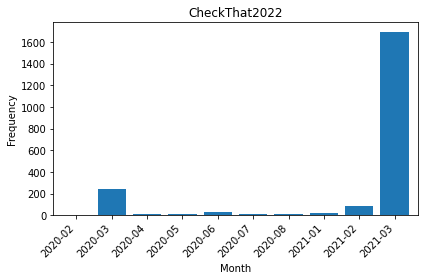

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# リストをdatetime型に変換
datetime_list = pd.to_datetime(datetime_list)

# DataFrameに変換，月単位に変換，月ごとの頻度をカウント，ヒストグラムを作成
df = pd.DataFrame(datetime_list, columns=['datetime'])
df['month'] = df['datetime'].dt.to_period('M')
month_counts = df['month'].value_counts().sort_index()
month_counts.plot(kind='bar', width=0.8)

# グラフを表示
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('CheckThat2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Full Data作成

### nlp4if

1．検証可能性　2，虚偽性　3，大衆の関心の有無　4，有害性　5，検証必要性　6，社会への悪影響　7，行政介入の必要性

In [9]:
import pandas as pd

# TSVファイルを読み込む
file_path = "nlp4if-2021_en/v3/covid19_disinfo_binary_english_train.tsv"
df = pd.read_csv(file_path, sep='\t')

In [10]:
nlp4if = df.apply(lambda row: {
    'tweet_no': row['tweet_no'],
    'text': row['tweet_text'],
    'q1_label': row['q1_label'],
    'q2_label': row['q2_label'],
    'q3_label': row['q3_label'],
    'q4_label': row['q4_label'],
    'q5_label': row['q5_label'],
    'q6_label': row['q6_label'],
    'q7_label': row['q7_label']
}, axis=1).tolist()

In [11]:
file_path = "nlp4if-2021_en/v3/covid19_disinfo_binary_english_train_ids.tsv"
df = pd.read_csv(file_path, sep='\t')
tweet_dict = df.set_index('tweet_no')['tweet_id'].to_dict()

In [12]:
for d in nlp4if:
    d["tweet_id"] = tweet_dict[d["tweet_no"]]

In [13]:
nlp4if[0]

{'tweet_no': 1,
 'text': 'For the average American the best way to tell if you have covid-19 is to cough in a rich person’s face and wait for their test results',
 'q1_label': 'no',
 'q2_label': nan,
 'q3_label': nan,
 'q4_label': nan,
 'q5_label': nan,
 'q6_label': 'no',
 'q7_label': 'no',
 'tweet_id': 1241025578527903750}

### CheckThat

In [14]:
import pandas as pd

# TSVファイルを読み込む
file_path = "./CheckThat/CT22/CT22_english_1A_checkworthy_train.tsv"
df = pd.read_csv(file_path, sep='\t')

In [15]:
CT22 = df.apply(lambda row: {
    'tweet_id': int(row['tweet_id']),
    'tweet_text': row['tweet_text'],
    'class_label': row['class_label']
}, axis=1).tolist()
# topic,urlは削除

In [16]:
CT22[0]

{'tweet_id': 1359350943356174336,
 'tweet_text': "India's gift of 100,000 COVID-19 vaccines arrived Barbados earlier today. This was a very special moment for all Barbadians and I want to thank Prime Minister Modi for his quick, decisive, and magnanimous action in allowing us to be the beneficiary of these vaccines. https://t.co/cSCb40c2mt",
 'class_label': 0}

### save data

In [42]:
save_bin("new_data/nlp4if.bin",nlp4if)
save_bin("new_data/CT22.bin",CT22)

## 2021年以降データ作成

### 24/7/7

In [28]:
nlp4if = read_bin("new_data/nlp4if.bin")
CT22 = read_bin("new_data/CT22.bin")

In [30]:
nlp4if_b21 = [] #869 => 418
for d in nlp4if:
    if get_datetime(d["tweet_id"]) >= datetime(2021, 1, 1):
        nlp4if_b21.append(d)

In [33]:
CT22_b21 = [] #2122 => 1804
for d in CT22:
    if get_datetime(d["tweet_id"]) >= datetime(2021, 1, 1):
        CT22_b21.append(d)

In [36]:
save_bin("new_data/nlp4if_b21.bin",nlp4if_b21)
save_bin("new_data/CT22_b21.bin",CT22_b21)